In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split

spark = (SparkSession.builder
         .appName("uber-date-trips")
         .master("local[2]")
         .getOrCreate()
         )

24/03/25 16:05:10 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
trip_data_2020_03_path = '../../data/fhvhv_tripdata_2020-03.parquet'
df = spark.read.options(header=True).parquet(trip_data_2020_03_path)


In [23]:
result = (df.select(split(col('request_datetime'), ' ')[0].alias('request_date'))
            .where(col('request_date').between('2020-03-01', '2020-03-31'))
          .sort(col('request_date'))
          .rdd.countByValue())

In [24]:
result

defaultdict(int,
            {Row(request_date='2020-03-01'): 780219,
             Row(request_date='2020-03-02'): 648912,
             Row(request_date='2020-03-03'): 697798,
             Row(request_date='2020-03-04'): 708065,
             Row(request_date='2020-03-05'): 731656,
             Row(request_date='2020-03-06'): 873517,
             Row(request_date='2020-03-07'): 887260,
             Row(request_date='2020-03-08'): 728148,
             Row(request_date='2020-03-09'): 628813,
             Row(request_date='2020-03-10'): 626369,
             Row(request_date='2020-03-11'): 628609,
             Row(request_date='2020-03-12'): 643230,
             Row(request_date='2020-03-13'): 661432,
             Row(request_date='2020-03-14'): 569556,
             Row(request_date='2020-03-15'): 447181,
             Row(request_date='2020-03-16'): 391081,
             Row(request_date='2020-03-17'): 312085,
             Row(request_date='2020-03-18'): 269258,
             Row(request_date

In [25]:
import pandas as pd

pd.Series(result, name='trips').to_csv("../../data/result/trips-date.csv")

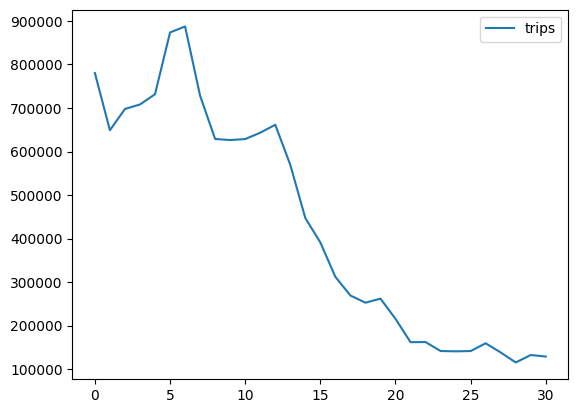

In [26]:
from matplotlib import pyplot as plt

trips = pd.read_csv("../../data/result/trips-date.csv")
trips.plot()

plt.show()